In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from sklearn.cluster import KMeans

pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
zip_lon_lat = pd.read_csv('../data/nj_zip-lon-lat.csv')
zip_lon_lat.rename(columns={"ZIP":"zip_code", "LAT":"latitude", "LNG":"longitude"},inplace=True)
#zip_lat_lon_df = zip_lon_lat[(zip_lon_lat["zip_code"]>6999) & (zip_lon_lat["zip_code"]<9000)]
zip_lon_lat.head()

,zip_code,latitude,longitude
0,7001,40.582316,-74.271506
1,7002,40.662338,-74.110275
2,7003,40.809128,-74.187155
3,7004,40.882508,-74.304593
4,7005,40.932771,-74.417304


In [3]:
inertial_range = range(1, 22)
inertia_list = list(inertial_range)
latlong_df = zip_lon_lat[["latitude","longitude"]]
inertias = []

for i in inertial_range:
    kmeans = KMeans(init="k-means++", n_clusters=i, random_state=42)
    kmeans.fit(latlong_df)
    inertias.append(kmeans.inertia_)

print(inertias)

[259.6901181035527, 99.35083248646077, 70.55363221879021, 51.11466142257114, 39.67931731049865, 31.78409883986846, 26.353140660639713, 22.98945314363316, 20.159887007081796, 18.04642744701217, 16.12621274001255, 14.672869912922632, 13.558371150207506, 12.672288084542089, 11.666261088911774, 10.847450408749355, 10.39588306391982, 9.692992418733198, 9.08303509831703, 8.617236586188028, 8.11735796514725]


In [4]:
inertias_df = pd.DataFrame(inertias)
inertias_df

,0
0,259.690118
1,99.350832
2,70.553632
3,51.114661
4,39.679317
5,31.784099
6,26.353141
7,22.989453
8,20.159887
9,18.046427


<Axes: >

<Figure size 1500x500 with 0 Axes>

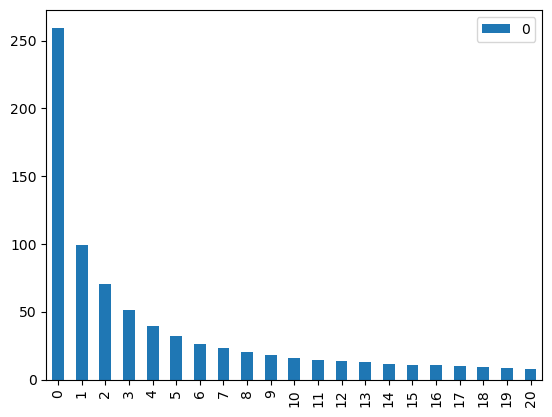

In [5]:
fig = plt.figure(figsize=(15.0,5))
inertias_df.plot.bar()

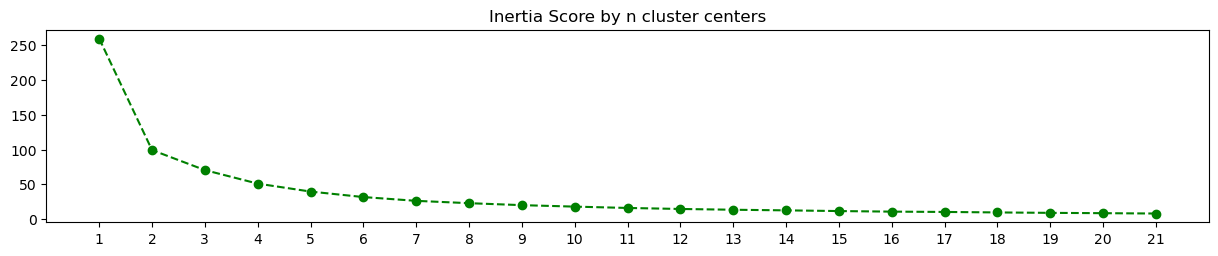

In [6]:
fig = plt.figure(figsize=(15.0,2.5))
#ax = fig.add_subplot(111)

plt.plot(inertia_list, inertias, '--o', color="green")
plt.xticks(inertia_list, inertia_list)
plt.title('Inertia Score by n cluster centers');

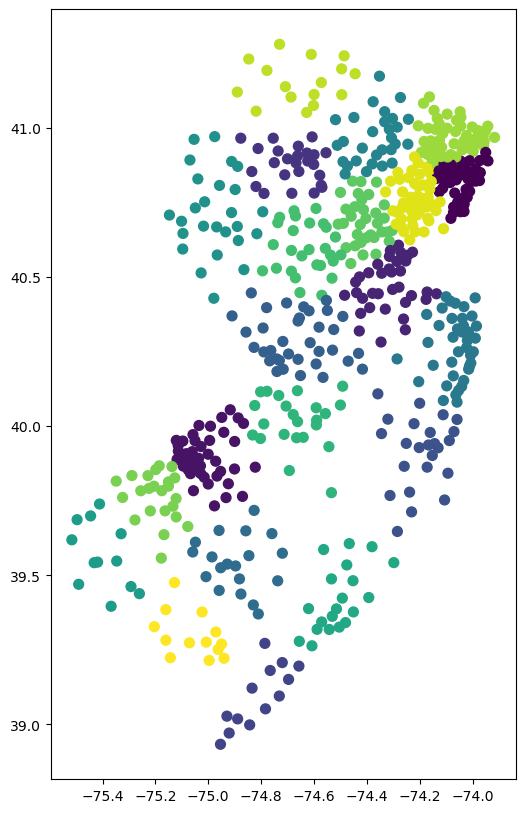

In [7]:
kmeans = KMeans(init="k-means++",n_clusters=21,random_state=42)
kmeans.fit(latlong_df)
y_kmeans = kmeans.predict(latlong_df)
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(6, 10))
plt.scatter(latlong_df["longitude"], latlong_df["latitude"], c=y_kmeans, s=50, cmap='viridis')

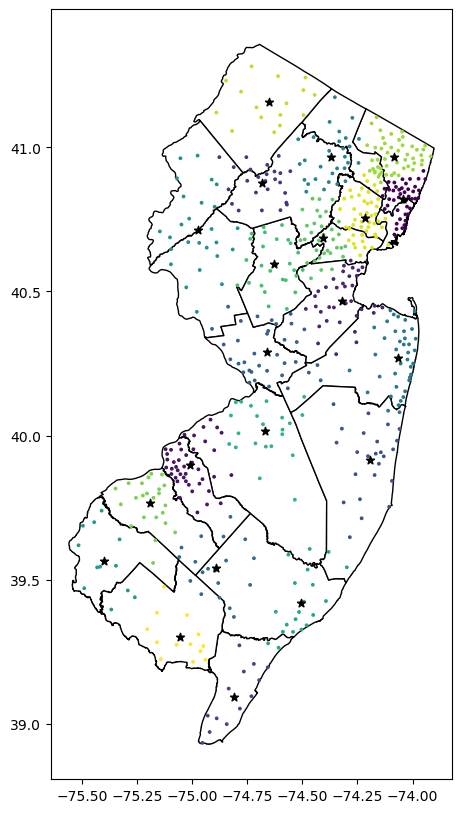

In [8]:

nj_concity = gpd.read_file("County_Boundaries_of_NJ.zip")
# just some data formatting to help map this later
nj_concity = nj_concity.to_crs('NAD83')

fig, ax = plt.subplots(figsize=(6, 10))
nj_concity["geometry"].plot(ax=ax,color="white",edgecolor='black')

plt.scatter(latlong_df["longitude"], latlong_df["latitude"], c=y_kmeans, s=3, cmap='viridis')
plt.scatter(centroids[:, 1], centroids[:, 0], marker="*", color="black")
